# Data Plot
## *DY data qT*
#### Author: *Alexei Prokudin* 
#### e-mail: *prokudin@jlab.org*

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# enable plots in the notebook
%matplotlib inline

### reading the data

In [2]:
## Check current dir
current = os.getcwd() # get current dir
print("Current working directory %s" % current) # check current dir

Current working directory /Users/avp5627/GIT/fitpack2/database/dy_qT


In [3]:
## Grabing files
datafiles=os.listdir('./expdata/') # list all files in dir
datafiles=[files for files in datafiles if files.endswith('.xlsx') and not files.startswith('~')]
print("Data files retrieved %s" % datafiles)

Data files retrieved ['90005.xlsx', '70011.xlsx', '70007.xlsx', '60006.xlsx', '70006.xlsx', '70010.xlsx', '90004.xlsx', '10001.xlsx', '10006.xlsx', '90003.xlsx', '10010.xlsx', '70001.xlsx', '60001.xlsx', '20003.xlsx', '20002.xlsx', '90002.xlsx', '10007.xlsx', '60003.xlsx', '70003.xlsx', '90001.xlsx', '80001.xlsx', '10004.xlsx', '10008.xlsx', '30001.xlsx', '20001.xlsx', '10009.xlsx', '10005.xlsx', '60002.xlsx', '70002.xlsx', '70009.xlsx', '70005.xlsx', '60005.xlsx', '10002.xlsx', '10003.xlsx', '70012.xlsx', '70004.xlsx', '60004.xlsx', '70008.xlsx', '40001.xlsx', '50001.xlsx']


In [4]:
data=pd.read_excel('./expdata/10001.xlsx')

In [5]:
data.keys()

Index(['RS', 'Q', 'Qmin', 'Qmax', 'y', 'ymin', 'ymax', 'qT', 'qTmin', 'qTmax',
       'value', 'tot_u', 'tot_plus', 'tot_minus', 'FiducialCuts',
       'ktCut1[GeV]', 'etaMin', 'etaMax', 'col', 'obs', 'units', 'beam',
       'target', 'process'],
      dtype='object')

### Plotting

In [6]:
def plot(data, xscale = 'linear', yscale = 'linear'):
    if "stat_u" and "%syst_c" in data.keys():
        delta = np.sqrt(data.stat_u**2.0+(data["%syst_c"]/100*data.value)**2.0)
    if "tot_u" in data.keys():   
        delta = data.tot_u
    plt.errorbar(data.qT,data.value,delta,
                 fmt='o',mfc='blue',
                 ecolor='blue',capsize=5, label=data.process[1])
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.legend()
    plt.title("Data %s" % data.col[1]) 
    plt.xlabel(r"$q_T$ (GeV)")
    plt.ylabel(r"$\frac{1}{\sigma}\frac{d \sigma}{dq _T}$ (GeV$^{-1}$)")


### Binning data

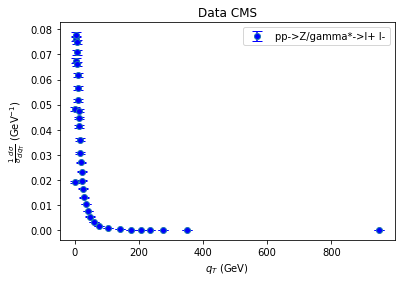

In [7]:
plot(data)

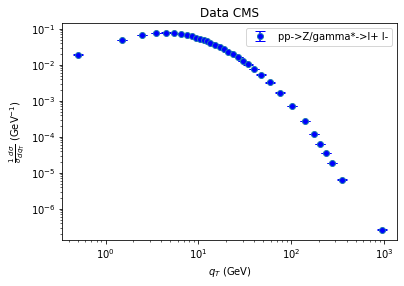

In [8]:
plot(data,'log','log')

In [9]:
data_tmd = data.query("qT/Q<0.3")

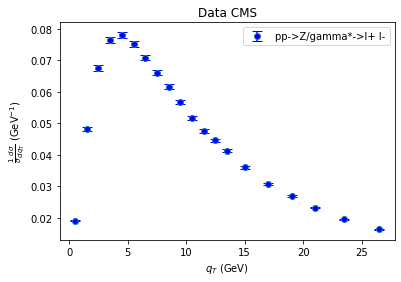

In [10]:
plot(data_tmd)

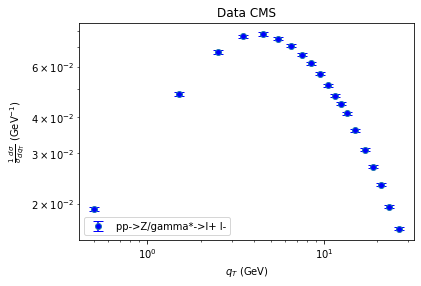

In [11]:
plot(data_tmd,'log','log')